In [1]:
from matplotlib import pyplot as plt
import os
import sys
import json
import pandas as pd
import numpy as np
from multiprocessing import Pool

abspath = os.path.abspath('.')
while not abspath.endswith('netscope'):
    abspath = os.path.dirname(abspath)
if abspath.endswith('netscope'):
    root_path = abspath
    print(root_path)
    os.chdir(root_path)
    sys.path.append(root_path)
    from analysis.load import Loader
    from analysis.ADR import ADR


markers = (list('ov^<>12348sp*hH+xXDd|_.,')+[i for i in range(12)]) * 10
import matplotlib as mpl
mpl.rcParams.update({
    'axes.spines.right': False,
    'axes.spines.top': False,
})
plt.rc('figure', figsize=[6,3.5])
plt.rc('font', family='Times New Roman', size=18)

/home/user/dds/netscope


In [4]:
# log_dir = "/mnt/netscope/data/slot2/fattree4/burst/20221010_1445GMT"
log_dir = "/home/user/dds/netscope/resources/example/20230207_0456GMT"
loader = Loader(log_dir)
burst = loader.load_hosts(debug=True)

# log_dir = "/mnt/netscope/data/slot2/s2l4/ecmp_imbalance2/20221005_2131GMT"
# loader = Loader(log_dir)
# ecmp = loader.load_hosts(debug=True)

In [5]:
burst.to_csv('burst2.csv', index=False)
# ecmp.to_csv('ecmp.csv', index=False)

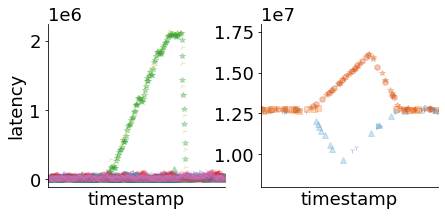

In [115]:
col = 'flow'
pattern = 's7,s6,s3,s14,s16,'
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(7, 3)) 
for i, c in enumerate(sorted(burst[col].unique())):
    # if not pattern in c: continue
    burst[burst[col]==c].plot('arrive_t', 'latency', ax=axes[0], label=c, alpha=0.3, lw=1, 
                              marker=markers[i], ls='')
axes[0].set_ylabel('latency')
axes[0].set_xlim(burst.arrive_t.min() + 4e7, burst.arrive_t.max())
axes[0].set_title('Micro-burst')

col = 'whole_path'
k = 0
for i, c in enumerate(['s1', 's2']):
    p_df = ecmp[ecmp.path_str.str.contains(c)]
    
    cmap = mpl.cm.get_cmap(['Blues', 'Oranges'][i])
    cmap_idx = np.linspace(0.4, 0.9, len(p_df.whole_path.unique()))
    j = 0
    for _, sdf in p_df.groupby('whole_path'):
        sdf.plot('arrive_t', 'latency', ax=axes[1], label=c, alpha=0.3, lw=1, 
                 marker=markers[k], ls='', color=cmap(cmap_idx[j]))
        k += 1
        j += 1
axes[1].set_xlim(ecmp.arrive_t.min() + 5.5e7, ecmp.arrive_t.max() - 1e7)
axes[1].set_ylim(0.8e7, 1.8e7)

for i in range(2):
    axes[i].set_xlabel('timestamp')
    axes[i].set_xticks([])
    axes[i].legend_.remove()
    # axes[i].set_yticks([])
    # axes[i].spines["bottom"].set_position(("data", 0))
    # axes[i].plot(1, 0, ">k", transform=axes[i].get_yaxis_transform(), clip_on=False)

In [105]:
np.linspace(0.5, 0.8, 3)

array([0. , 0.5, 1. ])

In [84]:
plt.get_cmap('Accent')(5)
plt.cm.Accent(4)

(0.2196078431372549, 0.4235294117647059, 0.6901960784313725, 1.0)

In [10]:
hosts[hosts.latency> 0.5e6].whole_path.unique()

array(['h16,s20,s18,s3,s10,s11,h6', 'h16,s20,s17,s1,s9,s11,h6',
       'h5,s11,h6', 'h16,s20,s17,s2,s9,s11,h6'], dtype=object)

In [90]:
jet = cm = plt.get_cmap('Reds')
# cNorm = colors.Normalize(vmin=0, vmax=5)
# scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

In [93]:
cm.Normalize(vmin=0, vmax=5)

AttributeError: 'LinearSegmentedColormap' object has no attribute 'Normalize'

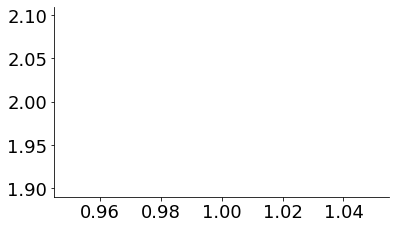

In [98]:
cmap = mpl.cm.get_cmap('Spectral')
cmap(0.5)
plt.plot([1,1], [2,2])#, color=cmap(0.5))

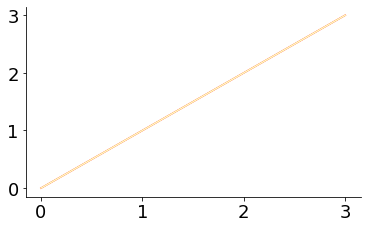

In [102]:
plt.plot(range(4), range(4), c='r')
plt.plot(range(4), range(4), c=cmap(0.5))

In [88]:
plt.get_cmap('Accent')(range(5))[0]

array([0.49803922, 0.78823529, 0.49803922, 1.        ])